In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import datasets
from sklearn.base import clone

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)
plt.style.use("fivethirtyeight")

In [7]:
diabetes = datasets.load_diabetes(as_frame=True)["frame"]
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


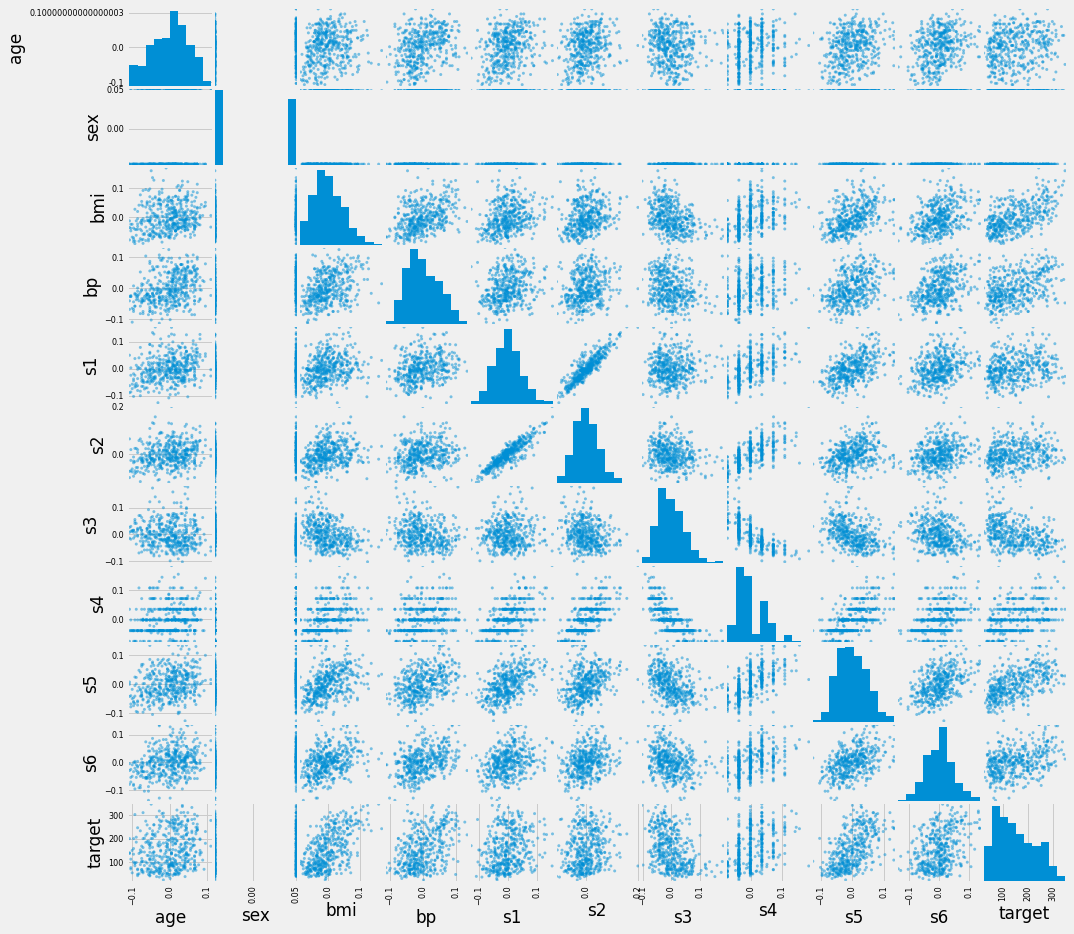

In [10]:
plot= pd.plotting.scatter_matrix(diabetes, alpha=0.5, figsize=(15,15));

(array([24., 23., 47., 53., 55., 85., 69., 47., 33.,  6.]),
 array([-0.10722563, -0.0854304 , -0.06363517, -0.04183994, -0.02004471,
         0.00175052,  0.02354575,  0.04534098,  0.06713621,  0.08893144,
         0.11072668]),
 <BarContainer object of 10 artists>)

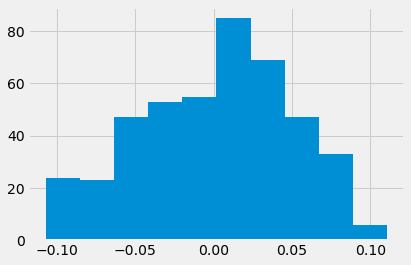

In [11]:
plt.hist(diabetes["age"])

(array([235.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 207.]),
 array([-0.04464164, -0.03510946, -0.02557729, -0.01604511, -0.00651293,
         0.00301924,  0.01255142,  0.02208359,  0.03161577,  0.04114794,
         0.05068012]),
 <BarContainer object of 10 artists>)

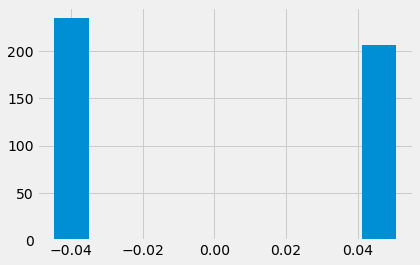

In [12]:
plt.hist(diabetes["sex"])

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-0.0902753 , -0.06419224, -0.03810919, -0.01202614,  0.01405691,
         0.04013997,  0.06622302,  0.09230607,  0.11838912,  0.14447217,
         0.17055523]),
 <BarContainer object of 10 artists>)

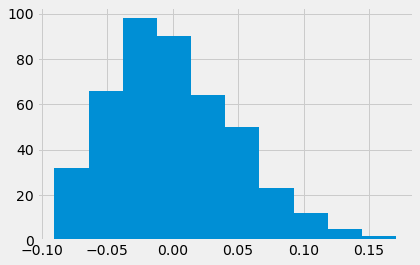

In [13]:
plt.hist(diabetes["bmi"])

In [14]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [15]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [16]:
y= diabetes["target"]
X= diabetes.drop(["target"], axis=1)

In [17]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [18]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=40)

In [20]:
rg= Ridge(alpha=0.5)
rg.fit(X_train, y_train)
y_pred= rg.predict(X_test)
y_pred

array([110.05188391, 169.38726463, 180.18105206, 185.03247077,
       161.91361891, 210.56959707, 154.38691172, 111.17385345,
       161.64746999, 135.25542908, 168.27476078, 118.56594687,
        76.14472038, 169.89704295,  83.75599977, 163.14213631,
       141.77068967, 134.88079309,  96.6435275 , 137.58284736,
        88.74401509, 215.15316724, 136.95258401, 129.43704544,
        91.51924386, 168.08161955, 144.21912424, 116.57766622,
       179.11034673,  92.84340691, 152.91528709, 153.16490225,
       128.72152524, 166.40104066,  98.90357105,  80.27345222,
       121.66195652, 101.20031669, 195.97981626, 143.92057455,
       149.6925968 ,  91.84273284, 156.28562883, 157.75494222,
       197.34786556, 140.25053396, 107.48425058, 156.42739204,
       124.14326315, 227.33238695, 198.98111415, 169.18201848,
       207.25296583, 198.98477225, 146.13294939, 181.82601784,
       135.20003142, 143.02155028, 125.77618021, 156.28836289,
       162.78134035,  77.71193328, 186.23160926, 179.95

In [21]:
y_mse= mean_squared_error(y_test, y_pred)
y_mse

3655.045787392184

In [22]:
r2= r2_score(y_test, y_pred)
r2

0.4072010484349502

In [31]:
n_folds=5
random_seed=0
kf= KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
test_cv_errors, train_cv_errors= np.empty(n_folds), np.empty(n_folds)

X_train2= np.array(X_train)
y_train2= np.array(y_train)

for j, (t_index, v_index) in enumerate(kf.split(X_train2)):
    X_tr= X_train2[t_index]
    y_tr= y_train2[t_index]
    X_v= X_train2[v_index]
    y_v= y_train2[v_index]
    
    rg=Ridge(alpha=0.5)
    rg.fit(X_tr, y_tr)
    
    #Train
    y_tr_pred= rg.predict(X_tr)
    mse1=mean_squared_error(y_tr, y_tr_pred)
    train_cv_errors[j]=mse1
    
    #Test
    y_v_pred= rg.predict(X_v)
    mse2=mean_squared_error(y_v, y_v_pred)
    test_cv_errors[j]=mse2

In [32]:
train_cv_errors

array([2966.49090389, 2911.85109045, 3004.54407349, 2760.9208334 ,
       3064.54651289])

In [33]:
test_cv_errors

array([3214.0775263 , 3220.25505986, 2591.88178737, 3737.0190202 ,
       2471.10292047])